In [ ]:
'''
1. 총 지출(개인별 일별) : 1인지출비용 : D_TRA1_ONE_COST, D_TRA2_ONE_COST, ..., D_TRA6_ONE_COST (평균)

2. 소득 : 가구 소득 : DQ6B
  - 1. 소득없음, 2부터는 100만원씩 상승, 12 월평균 1000만원 이상 까지 총 12개 군집

3. 주요 이용 교통 수단 : 주요 교통수단 1순위만 : A1_1
  - 군집화 : :
    A : 자가용, 차량대여/렌트
    B : 철도, 항공기, 선박/해상 교통
    C : 고속/시외/시내버스, 전세/관광버스
    D : 지하철, 자전거, 택시, 기타

4. 직업 : BJOB
    1. 임금봉급근로자
    2. 고용원 있는 사업주
    3. 고용원 없는 자영자
    4. 무급가족 종사자
    5. 전업주부
    6. 학생
    7. 기타

5. 여행 기간: D_TRA1_S_Day, D_TRA2_S_Day, ..., D_TRA6_S_Day (평균) 당
  - 0(당일치기), 1(1박2일), 2(2박3일 이상)

6. 여행지 선택 이유 1순위만 : A4_1
  - 군집화 : 
    '여행지 특징' : 볼거리 제공(2), 여행지 지명도(1)
    '소통?': 쇼핑(7), 음식(8), 여행 동반자 유형(14), 경험자의 추천(11)
    '편의성': 숙박시설(6), 관광지 편의시설(12)
    '가성비': 여행할 수 있는 시간(5), 저렴한 여행경비(3), 이동거리(4), 교통편(9)
    '교육' : 체험 프로그램 유무(10), 교육성(13), 기타(15)

ㅇ연령 : BAGE
  - 50대/60대만
  
  연령(BAGE) & 성별(BSEX) & 동행자 수(A7) & 여행정보 획득 경로(A6_1)
  여행정보 획득 경로
    1. 인터넷 사이트/모바일 앱
    2. 기사 및 방송 프로그램
    3. 광고
    4. 여행사
    5. 주변인
    6. 관광 안내 서적
    7. 과거 방문 경험
    8. 정보 없이 방문
    9. 기타
'''

# Import Lib

In [73]:
from utils.data_loader import load_national_travel_survey
from utils.visualize import Visualization_c
from kmodes.kmodes import KModes

from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter
from matplotlib.ticker import FuncFormatter

rc('font', family='Malgun Gothic')

# 2022 + 2021 국민 여행 조사

In [2]:
local_code_dict = {
    '영주' : '37060',
    '단양' : '33380',
    '안동' : '37040',
    '예천' : '37400',
    '봉화' : '37410',
    '태백' : '32050'
}

In [4]:
df_trip_yeongju, df_avg_a4 = load_national_travel_survey([local_code_dict['영주']])
df_trip_yeongju.reset_index(drop=True, inplace=True)

df_trip_injup, df_avg_a4 = load_national_travel_survey(['33380', '37040', '37400', '37410', '32050'])
df_trip_injup.reset_index(drop=True, inplace=True)

In [12]:
df_yeongju_age = df_trip_yeongju['BAGE'].value_counts() / len(df_trip_yeongju) * 100
df_yeongju_age

BAGE
5    27.34375
6    21.09375
4    21.09375
3    10.93750
7    10.15625
2     7.03125
1     2.34375
Name: count, dtype: float64

In [11]:

df_injup_age = df_trip_injup['BAGE'].value_counts() / len(df_trip_injup) * 100
df_injup_age

BAGE
5    27.192982
4    21.553885
3    16.040100
6    13.784461
2    11.779449
7     7.017544
1     2.631579
Name: count, dtype: float64

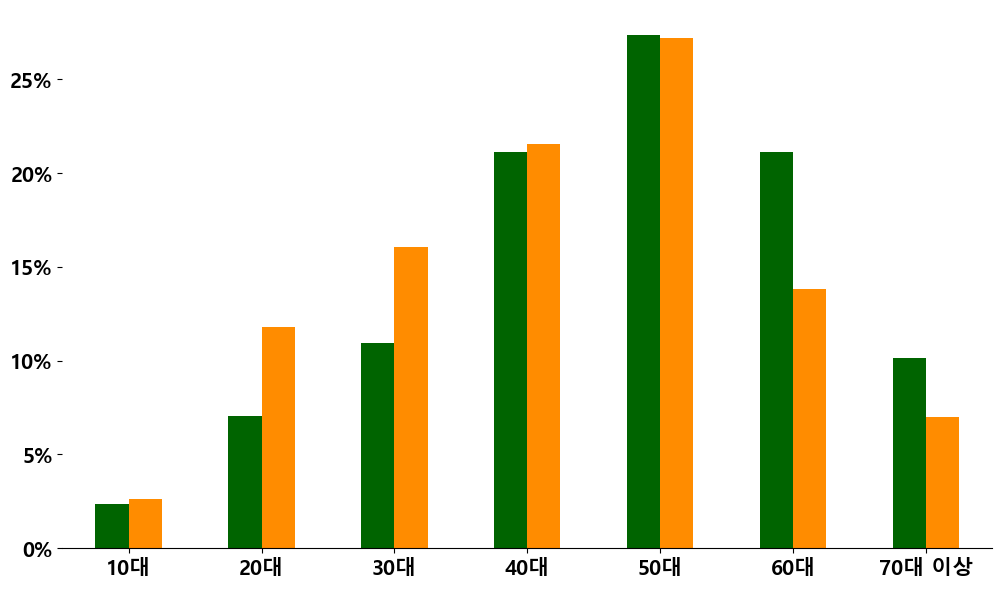

In [72]:
import pandas as pd

temp_df = pd.concat([df_yeongju_age, df_injup_age], axis=1)
temp_df.columns = ['영주', '인접지역']
temp_df.sort_index().plot(kind = 'bar', color = ['darkgreen', 'darkorange'], figsize=(12, 7), legend = False)

plt.xlabel(None)
plt.xticks([0,1, 2, 3, 4, 5, 6], rotation = 0, labels = ['10대', '20대', '30대', '40대', '50대', '60대', '70대 이상'], fontsize = 15, fontweight = 'bold')
plt.yticks(fontsize = 15, fontweight = 'bold')

plt.gca().yaxis.set_major_formatter(PercentFormatter())
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}%'))

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.show()

## 영주

In [ ]:
df_trip, df_avg_a4 = load_national_travel_survey([local_code_dict['영주']])
df_trip.reset_index(drop=True, inplace=True)
df_trip

In [ ]:
df_trip['여행지_선택'].value_counts().sort_index()

In [ ]:
plt.figure(figsize=(12, 7))
sns.barplot(
    x = df_trip['BAGE'].value_counts().sort_index().index,
    y = df_trip['BAGE'].value_counts().sort_index().values,
    palette = 'Pastel2',
    legend = False
)

plt.xlabel(None)
plt.ylabel(None)
plt.yticks(fontsize = 15, fontweight = 'bold')
plt.xticks(
    [0,1,2,3,4,5,6],
    labels = ['10대', '20대', '30대', '40대', '50대', '60대', '70대 이상'],
    fontsize = 15,
    fontweight = 'bold'
)
plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
plt.gca().spines['top'].set_visible(False) #위 테두리 제거
plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거

plt.show()

In [ ]:
df_trip['A6_1'].value_counts().plot(kind='bar')
plt.title('information')

In [ ]:
travel_factors = {
    1: "여행지 지명도",
    2: "볼거리 제공",
    3: "저렴한 여행경비",
    4: "이동거리",
    5: "여행할 수 있는 시간",
    6: "숙박시설",
    7: "쇼핑",
    8: "음식",
    9: "교통편",
    10: "체험프로그램 유무",
    11: "경험자의 추천",
    12: "관광지 편의시설",
    13: "교육성(교육적 측면)",
    14: "여행 동반자 유형",
    15: "기타",
}

plt.show()

plt.figure(figsize=(12, 7))
sns.barplot(
    x = df_avg_a4['A4_1'].value_counts().index,
    y = df_avg_a4['A4_1'].value_counts().values,
    palette = 'Pastel1',
    legend = False
)

plt.xlabel(None)
plt.ylabel(None)
plt.yticks(fontsize = 15, fontweight = 'bold')

plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
plt.gca().spines['top'].set_visible(False) #위 테두리 제거
plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거

plt.gca().set_xticklabels([travel_factors[int(i)] for i in df_avg_a4['A4_1'].value_counts().index], fontsize = 10, fontweight = 'bold', rotation = 45)


plt.show()

In [ ]:
# Elbow curve 로 적절한 K 찾기(나이 없앤거)
cost = []
K = range(1,30)
for num_clusters in list(K):
    kmode = KModes(
        n_clusters = num_clusters,
        init = "random",
        n_init = 10,
        verbose = 0,
        random_state = 2
    )
    kmode.fit_predict(df_trip)
    cost.append(kmode.cost_)
    

plt.figure(figsize = (8, 5))
plt.plot(K,
         cost,
         linestyle = '-',
         marker = 'o',
         color = 'green',
         linewidth = 4,
         markersize = 9,
         markerfacecolor = 'darkgreen'
)
plt.grid(False)
# plt.title('영주시 군집화 Elblow Curve', fontsize = 17, pad = 15, fontweight = 'bold')
plt.xlabel('군집 개수', fontsize = 17, labelpad = 15, fontweight = 'bold')
plt.xticks(fontsize = 13, fontweight = 'bold')
plt.yticks(fontsize = 13, fontweight = 'bold')

plt.show()

In [ ]:
# 군집화
number_K = 4
kmode = KModes(number_K)
clusters = kmode.fit_predict(df_trip.values)
df_trip['cluster'] = clusters + 1
df_trip

In [ ]:
df_trip['cluster'].value_counts()

In [ ]:
# 군집별 인원 수 시각화
sns.countplot(
    x = 'cluster',
    data = df_trip,
    hue = 'cluster',
    legend = False,
    palette = 'Greens_d'
)

plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
plt.gca().spines['top'].set_visible(False) #위 테두리 제거
plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거
# plt.gca().axes.xaxis.set_visible(False) #x축 제거

plt.ylabel(None)
plt.xlabel(None)
plt.yticks(fontsize = 15, fontweight = 'bold')
# plt.xticks([0, 1, 2, 3], ['군집 1', '군집 2', '군집 3', '군집 4'], fontsize = 15, fontweight = 'bold')
plt.xticks(fontsize = 15, fontweight = 'bold')

plt.show()

In [ ]:
cluster_num = 3
color_code = '#3E734D'

df_trip_temp = df_trip[df_trip['cluster'] == cluster_num].loc[:, ['BAGE', 'A6_1', 'Cost_Quantile', '여행지_선택']].reset_index(drop=True).copy()
visualize_col_name = ['BAGE', 'A6_1', 'Cost_Quantile', '여행지_선택']

fig = plt.figure(figsize=(13, 9))

order_age = [1, 2, 3, 4, 5, 6, 7]
order_a6 = [1,2,3,4,5,6,7,8,9]
order_cost = ['A', 'B', 'C', 'D'] # 여행 소비 구간
order_purpose = ['A', 'B', 'C', 'D', 'E'] # 여행 목적

# 연령대
ax1 = fig.add_subplot(221)
ax1.set_title('연령대', fontsize = 16, fontweight = 'bold', pad = 5)
sns.countplot(
    x = 'BAGE',
    data = df_trip_temp,
    order = order_age,
    color = color_code
)
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax1.set_xticklabels(['10대', '20대', '30대', '40대', '50대', '60대', '70대 이상'], fontsize = 12, fontweight = 'bold')
ax1.tick_params(axis='y', labelsize=12)
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))

# 소비
ax2 = fig.add_subplot(222)
ax2.set_title('소비', fontsize = 16, fontweight = 'bold', pad = 5)
sns.countplot(
    x = 'Cost_Quantile',
    data = df_trip_temp,
    order = order_cost,
    color = color_code
)
ax2.set_xlabel(None)
ax2.set_ylabel(None)
ax2.set_xticklabels(['1', '2', '3', '4'], fontsize = 12, fontweight = 'bold')
ax2.tick_params(axis='y', labelsize = 12)
ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))

# 정보 획득 경로
ax3 = fig.add_subplot(223)
ax3.set_title('정보 획득 경로', fontsize = 16, fontweight = 'bold', pad = 5)
sns.countplot(
    x = 'A6_1',
    data = df_trip_temp,
    order = order_a6,
    color = color_code
)
ax3.set_xlabel(None)
ax3.set_ylabel(None)
ax3.set_xticklabels(
    ['인터넷/앱', '방송', '광고', '여행사', '주변인', '안내서적', '과거방문경험', '정보없이방문', '기타'],
    fontsize = 10,
    fontweight = 'bold',
    rotation = 45
)
ax3.tick_params(axis='y', labelsize = 12)
ax3.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))

# 여행지 선택 이유
ax4 = fig.add_subplot(224)
ax4.set_title('여행 목적 분류', fontsize = 16, fontweight = 'bold', pad = 5)
sns.countplot(
    x = '여행지_선택',
    data = df_trip_temp,
    order = order_purpose,
    color = color_code
)
ax4.set_xlabel(None)
ax4.set_ylabel(None)
ax4.set_xticklabels(['A', 'B', 'C', 'D', 'E'], fontsize = 12, fontweight = 'bold')
ax4.tick_params(axis='y', labelsize = 12)
ax4.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))
    
plt.show()

In [ ]:
# for i in df_trip.cluster.value_counts().index:
#     Visualization_c(i, 'cluster', df_trip)

In [ ]:
df_avg_a4['cluster'] = df_trip['cluster']
df_avg_a4

In [ ]:
travel_factors = {
    1: "여행지 지명도",
    2: "볼거리 제공",
    3: "저렴한 여행경비",
    4: "이동거리",
    5: "여행할 수 있는 시간",
    6: "숙박시설",
    7: "쇼핑",
    8: "음식",
    9: "교통편",
    10: "체험프로그램 유무",
    11: "경험자의 추천",
    12: "관광지 편의시설",
    13: "교육성(교육적 측면)",
    14: "여행 동반자 유형",
    15: "기타",
}

cluster_num = 3
color_code = '#486B51'

plt.figure(figsize=(12, 7))
df_avg_a4[df_avg_a4['cluster'] == cluster_num]['A4_1'].value_counts().plot(kind = 'bar', grid = False, color = color_code)
plt.xlabel(None)
plt.yticks(fontsize = 15, fontweight = 'bold')
plt.xticks(fontsize = 15, fontweight = 'bold', rotation = 0)
# plt.gca().set_xticklabels([travel_factors[int(i)] for i in df_avg_a4[df_avg_a4['cluster'] == cluster_num]['A4_1'].value_counts().index], fontsize = 10, fontweight = 'bold', rotation = 45)

plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
plt.gca().spines['top'].set_visible(False) #위 테두리 제거
plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거

plt.show()

## 영주 + 인접 지역

In [3]:
df_trip, df_avg_a4 = load_national_travel_survey(list(local_code_dict.values()))
df_trip.reset_index(drop=True, inplace=True)
df_trip

,DQ6B,BAGE,BJOB,A6_1,Cost_Quantile,여행지_선택
0,4,3,1,5,D,B
1,8,4,1,1,A,A
2,8,4,1,8,C,A
3,5,3,1,8,B,C
4,8,2,12,8,C,D
...,...,...,...,...,...,...
910,6,5,1,5,B,D
911,6,6,3,1,C,A
912,5,7,3,5,D,B
913,4,7,4,4,D,B


In [10]:
df_trip['A6_1'].value_counts().sort_index()

A6_1
1    182
2     19
3     16
4      3
5    247
6      8
7    312
8    128
Name: count, dtype: int64

In [ ]:
cost = []
K = range(1,30)
for num_clusters in list(K):
    kmode = KModes(
        n_clusters = num_clusters,
        init = "random",
        n_init = 10,
        verbose = 0,
        random_state = 2
    )
    kmode.fit_predict(df_trip)
    cost.append(kmode.cost_)
    

plt.figure(figsize = (8, 5))
plt.plot(K,
         cost,
         linestyle = '-',
         marker = 'o',
         color = 'green',
         linewidth = 4,
         markersize = 9,
         markerfacecolor = 'darkgreen'
)
plt.grid(False)
# plt.title('영주시 군집화 Elblow Curve', fontsize = 17, pad = 15, fontweight = 'bold')
plt.xlabel('군집 개수', fontsize = 17, labelpad = 15, fontweight = 'bold')
plt.xticks(fontsize = 13, fontweight = 'bold')
plt.yticks(fontsize = 13, fontweight = 'bold')

plt.show()

In [ ]:
# 군집화

number_K = 6

kmode = KModes(number_K)
clusters = kmode.fit_predict(df_trip.values)

df_trip['cluster'] = clusters + 1
df_trip

In [ ]:
df_trip['cluster'].value_counts()

In [ ]:
# 군집별 인원 수 시각화
sns.countplot(
    x = 'cluster',
    data = df_trip,
    hue = 'cluster',
    legend = False,
)

plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
plt.gca().spines['top'].set_visible(False) #위 테두리 제거
plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거
# plt.gca().axes.xaxis.set_visible(False) #x축 제거

plt.ylabel(None)
plt.xlabel(None)
plt.yticks(fontsize = 15, fontweight = 'bold')
# plt.xticks([0, 1, 2, 3], ['군집 1', '군집 2', '군집 3', '군집 4'], fontsize = 15, fontweight = 'bold')
plt.xticks(fontsize = 15, fontweight = 'bold')

plt.show()

In [ ]:
df_avg_a4['cluster'] = df_trip['cluster']
df_avg_a4

In [ ]:
cluster_num = 6
color_code = '#2D223A'

df_trip_temp = df_trip[df_trip['cluster'] == cluster_num].loc[:, ['BAGE', 'A6_1', 'Cost_Quantile', '여행지_선택']].reset_index(drop=True).copy()
visualize_col_name = ['BAGE', 'A6_1', 'Cost_Quantile', '여행지_선택']

fig = plt.figure(figsize=(13, 9))

order_age = [1, 2, 3, 4, 5, 6, 7]
order_a6 = [1,2,3,4,5,6,7,8,9]
order_cost = ['A', 'B', 'C', 'D'] # 여행 소비 구간
order_purpose = ['A', 'B', 'C', 'D', 'E'] # 여행 목적

# 연령대
ax1 = fig.add_subplot(221)
ax1.set_title('연령대', fontsize = 16, fontweight = 'bold', pad = 5)
sns.countplot(
    x = 'BAGE',
    data = df_trip_temp,
    order = order_age,
    color = color_code,
)
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax1.set_xticklabels(['10대', '20대', '30대', '40대', '50대', '60대', '70대 이상'], fontsize = 12, fontweight = 'bold')
ax1.tick_params(axis='y', labelsize=12)
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))
plt.grid(False)

# 소비
ax2 = fig.add_subplot(222)
ax2.set_title('소비', fontsize = 16, fontweight = 'bold', pad = 5)
sns.countplot(
    x = 'Cost_Quantile',
    data = df_trip_temp,
    order = order_cost,
    color = color_code
)
ax2.set_xlabel(None)
ax2.set_ylabel(None)
ax2.set_xticklabels(['1', '2', '3', '4'], fontsize = 12, fontweight = 'bold')
ax2.tick_params(axis='y', labelsize = 12)
ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))
plt.grid(False)

# 정보 획득 경로
ax3 = fig.add_subplot(223)
ax3.set_title('정보 획득 경로', fontsize = 16, fontweight = 'bold', pad = 5)
sns.countplot(
    x = 'A6_1',
    data = df_trip_temp,
    order = order_a6,
    color = color_code
)
ax3.set_xlabel(None)
ax3.set_ylabel(None)
ax3.set_xticklabels(
    ['인터넷/앱', '방송', '광고', '여행사', '주변인', '안내서적', '과거방문경험', '정보없이방문', '기타'],
    fontsize = 10,
    fontweight = 'bold',
    rotation = 45
)
ax3.tick_params(axis='y', labelsize = 12)
ax3.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))
plt.grid(False)

# 여행지 선택 이유
ax4 = fig.add_subplot(224)
ax4.set_title('여행 목적 분류', fontsize = 16, fontweight = 'bold', pad = 5)
sns.countplot(
    x = '여행지_선택',
    data = df_trip_temp,
    order = order_purpose,
    color = color_code
)
ax4.set_xlabel(None)
ax4.set_ylabel(None)
ax4.set_xticklabels(['A', 'B', 'C', 'D', 'E'], fontsize = 12, fontweight = 'bold')
ax4.tick_params(axis='y', labelsize = 12)
ax4.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))
plt.grid(False)

plt.show()

In [ ]:
df_avg_a4[df_avg_a4['cluster'] == 6]['A4_1'].value_counts()

In [ ]:
travel_factors = {
    1: "여행지 지명도",
    2: "볼거리 제공",
    3: "저렴한 여행경비",
    4: "이동거리",
    5: "여행할 수 있는 시간",
    6: "숙박시설",
    7: "쇼핑",
    8: "음식",
    9: "교통편",
    10: "체험프로그램 유무",
    11: "경험자의 추천",
    12: "관광지 편의시설",
    13: "교육성(교육적 측면)",
    14: "여행 동반자 유형",
    15: "기타",
}

cluster_num = 4
color_code = '#333333'

df_avg_a4[df_avg_a4['cluster'] == cluster_num]['A4_1'].value_counts().plot(kind = 'bar', grid = False, color = color_code)
plt.xlabel(None)
plt.yticks(fontsize = 10, fontweight = 'bold')
plt.gca().set_xticklabels([travel_factors[int(i)] for i in df_avg_a4[df_avg_a4['cluster'] == cluster_num]['A4_1'].value_counts().index], fontsize = 10, fontweight = 'bold', rotation = 90)

plt.show()

## 서울 + 부산 + 인천

In [11]:
total_city_code_dict = {
    '서울' : ['11230', '11250', '11090', '11160', '11210', '11050', '11170', '11180', '11110', '11100', '11060', '11200', '11140', '11130', '11220', '11040', '11080', '11240', '11150', '11190', '11030', '11120', '11010', '11020', '11070'],
    '부산' : ['21120', '21110', '21070', '21030', '21060', '21050', '21080', '21150', '21100', '21020', '21140', '21130', '21040', '21010', '21090', '21310'],
    '인천' : ['23070', '23030', '23050', '23020', '23060' ,'23080', '23040', '23010', '23310', '23320']
}

total_city_code_list = []
for city_code in total_city_code_dict.values():
    total_city_code_list.extend(city_code)

In [12]:
df_trip, df_avg_a4 = load_national_travel_survey(total_city_code_list)
df_trip.reset_index(drop=True, inplace=True)
df_trip

,DQ6B,BAGE,BJOB,A6_1,Cost_Quantile,여행지_선택
0,5,1,12,8,A,D
1,7,2,1,8,C,B
2,4,4,1,8,B,A
3,5,5,1,1,C,A
4,7,5,1,7,C,A
...,...,...,...,...,...,...
4540,9,5,3,4,D,A
4541,5,2,12,5,D,E
4542,5,5,11,5,D,A
4543,5,4,1,1,D,D


In [16]:
df_trip['A6_1'].value_counts().sort_index()

A6_1
1     766
2     104
3      92
4      14
5    1176
6      11
7    1587
8     795
Name: count, dtype: int64

In [ ]:
cost = []
K = range(1,30)
for num_clusters in list(K):
    kmode = KModes(
        n_clusters = num_clusters,
        init = "random",
        n_init = 10,
        verbose = 0,
        random_state = 2
    )
    kmode.fit_predict(df_trip)
    cost.append(kmode.cost_)
    

plt.figure(figsize = (8, 5))
plt.plot(K,
         cost,
         linestyle = '-',
         marker = 'o',
         color = 'green',
         linewidth = 4,
         markersize = 9,
         markerfacecolor = 'darkgreen'
)
plt.grid(False)
# plt.title('영주시 군집화 Elblow Curve', fontsize = 17, pad = 15, fontweight = 'bold')
plt.xlabel('군집 개수', fontsize = 17, labelpad = 15, fontweight = 'bold')
plt.xticks(fontsize = 13, fontweight = 'bold')
plt.yticks(fontsize = 13, fontweight = 'bold')

plt.show()

In [ ]:
# 군집화
number_K = 13

kmode = KModes(number_K)
clusters = kmode.fit_predict(df_trip.values)

df_trip['cluster'] = clusters + 1
df_trip

In [ ]:
df_trip['cluster'].value_counts()

In [ ]:
# 군집별 인원 수 시각화
sns.countplot(
    x = 'cluster',
    data = df_trip,
    hue = 'cluster',
    legend = False,
    palette = 'Blues_d'
)

plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
plt.gca().spines['top'].set_visible(False) #위 테두리 제거
plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거
# plt.gca().axes.xaxis.set_visible(False) #x축 제거

plt.ylabel(None)
plt.xlabel(None)
plt.yticks(fontsize = 15, fontweight = 'bold')
# plt.xticks([0, 1, 2, 3], ['군집 1', '군집 2', '군집 3', '군집 4'], fontsize = 15, fontweight = 'bold')
plt.xticks(fontsize = 15, fontweight = 'bold')

plt.show()

In [ ]:
cluster_num = 12
color_code = '#3A4E5C'

df_trip_temp = df_trip[df_trip['cluster'] == cluster_num].loc[:, ['BAGE', 'A6_1', 'Cost_Quantile', '여행지_선택']].reset_index(drop=True).copy()
visualize_col_name = ['BAGE', 'A6_1', 'Cost_Quantile', '여행지_선택']

fig = plt.figure(figsize=(13, 9))

order_age = [1, 2, 3, 4, 5, 6, 7]
order_a6 = [1,2,3,4,5,6,7,8,9]
order_cost = ['A', 'B', 'C', 'D'] # 여행 소비 구간
order_purpose = ['A', 'B', 'C', 'D', 'E'] # 여행 목적

# 연령대
ax1 = fig.add_subplot(221)
ax1.set_title('연령대', fontsize = 16, fontweight = 'bold', pad = 5)
sns.countplot(
    x = 'BAGE',
    data = df_trip_temp,
    order = order_age,
    color = color_code,
)
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax1.set_xticklabels(['10대', '20대', '30대', '40대', '50대', '60대', '70대 이상'], fontsize = 12, fontweight = 'bold')
ax1.tick_params(axis='y', labelsize=12)
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))
plt.grid(False)

# 소비
ax2 = fig.add_subplot(222)
ax2.set_title('소비', fontsize = 16, fontweight = 'bold', pad = 5)
sns.countplot(
    x = 'Cost_Quantile',
    data = df_trip_temp,
    order = order_cost,
    color = color_code
)
ax2.set_xlabel(None)
ax2.set_ylabel(None)
ax2.set_xticklabels(['1', '2', '3', '4'], fontsize = 12, fontweight = 'bold')
ax2.tick_params(axis='y', labelsize = 12)
ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))
plt.grid(False)

# 정보 획득 경로
ax3 = fig.add_subplot(223)
ax3.set_title('정보 획득 경로', fontsize = 16, fontweight = 'bold', pad = 5)
sns.countplot(
    x = 'A6_1',
    data = df_trip_temp,
    order = order_a6,
    color = color_code
)
ax3.set_xlabel(None)
ax3.set_ylabel(None)
ax3.set_xticklabels(
    ['인터넷/앱', '방송', '광고', '여행사', '주변인', '안내서적', '과거방문경험', '정보없이방문', '기타'],
    fontsize = 10,
    fontweight = 'bold',
    rotation = 45
)
ax3.tick_params(axis='y', labelsize = 12)
ax3.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))
plt.grid(False)

# 여행지 선택 이유
ax4 = fig.add_subplot(224)
ax4.set_title('여행 목적 분류', fontsize = 16, fontweight = 'bold', pad = 5)
sns.countplot(
    x = '여행지_선택',
    data = df_trip_temp,
    order = order_purpose,
    color = color_code
)
ax4.set_xlabel(None)
ax4.set_ylabel(None)
ax4.set_xticklabels(['A', 'B', 'C', 'D', 'E'], fontsize = 12, fontweight = 'bold')
ax4.tick_params(axis='y', labelsize = 12)
ax4.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))
plt.grid(False)

plt.show()

In [ ]:
df_avg_a4['cluster'] = df_trip['cluster']
df_avg_a4

In [ ]:
df_avg_temp = df_avg_a4[df_avg_a4['cluster'].isin([7,11,12,13])].set_index('cluster').copy()
df_avg_temp.drop('DAY_AVG_COST', axis=1, inplace=True)
df_avg_temp = df_avg_temp.astype(int)
df_avg_temp = df_avg_temp.sort_values(by='A4_1')

travel_factors = {
    1: "여행지 지명도",
    2: "볼거리 제공",
    3: "저렴한 여행경비",
    4: "이동거리",
    5: "여행할 수 있는 시간",
    6: "숙박시설",
    7: "쇼핑",
    8: "음식",
    9: "교통편",
    10: "체험프로그램 유무",
    11: "경험자의 추천",
    12: "관광지 편의시설",
    13: "교육성(교육적 측면)",
    14: "여행 동반자 유형",
    15: "기타",
}

cluster_colors = {
    7: "#4884AF",
    11: "#3A4E5C",
    12: "#364047",
    13: "#333333"
}

plt.figure(figsize=(12, 7))

sns.countplot(
    x = 'A4_1',
    data = df_avg_temp,
    hue = 'cluster',
    palette = cluster_colors,
    legend = False
)

plt.xlabel(None)
plt.ylabel(None)
plt.yticks(fontsize = 15, fontweight = 'bold')
plt.xticks(fontsize = 15, fontweight = 'bold')

plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
plt.gca().spines['top'].set_visible(False) #위 테두리 제거
plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거


plt.show()

In [ ]:
travel_factors = {
    1: "여행지 지명도",
    2: "볼거리 제공",
    3: "저렴한 여행경비",
    4: "이동거리",
    5: "여행할 수 있는 시간",
    6: "숙박시설",
    7: "쇼핑",
    8: "음식",
    9: "교통편",
    10: "체험프로그램 유무",
    11: "경험자의 추천",
    12: "관광지 편의시설",
    13: "교육성(교육적 측면)",
    14: "여행 동반자 유형",
    15: "기타",
}

cluster_num = 6
color_code = '#668FAB'

plt.figure(figsize=(12, 7))
df_avg_a4[df_avg_a4['cluster'] == cluster_num]['A4_1'].value_counts().plot(kind = 'bar', grid = False, color = color_code)
plt.xlabel(None)
plt.yticks(fontsize = 13, fontweight = 'bold')
plt.xticks(fontsize = 13, fontweight = 'bold', rotation = 0)

# plt.gca().set_xticklabels([travel_factors[int(i)] for i in df_avg_a4[df_avg_a4['cluster'] == cluster_num]['A4_1'].value_counts().index], fontsize = 15, fontweight = 'bold', rotation = 90)
plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
plt.gca().spines['top'].set_visible(False) #위 테두리 제거
plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거

plt.show()

# 서부인 돈 많이

In [ ]:
total_city_code_dict = {
    '서울' : ['11230', '11250', '11090', '11160', '11210', '11050', '11170', '11180', '11110', '11100', '11060', '11200', '11140', '11130', '11220', '11040', '11080', '11240', '11150', '11190', '11030', '11120', '11010', '11020', '11070'],
    '부산' : ['21120', '21110', '21070', '21030', '21060', '21050', '21080', '21150', '21100', '21020', '21140', '21130', '21040', '21010', '21090', '21310'],
    '인천' : ['23070', '23030', '23050', '23020', '23060' ,'23080', '23040', '23010', '23310', '23320']
}

total_city_code_list = []
for city_code in total_city_code_dict.values():
    total_city_code_list.extend(city_code)
    
df_trip, df_avg_a4 = load_national_travel_survey(total_city_code_list)
df_trip.reset_index(drop=True, inplace=True)
df_trip

In [ ]:
df_trip_c = df_trip[df_trip['Cost_Quantile'] == 'C']
df_avg_a4_c = df_avg_a4[df_trip['Cost_Quantile'] == 'C']

In [ ]:
df_trip_d = df_trip[df_trip['Cost_Quantile'] == 'D']
df_avg_a4_d = df_avg_a4[df_trip['Cost_Quantile'] == 'D']

In [ ]:
import pandas as pd

In [ ]:
df_trip = pd.concat([df_trip_c, df_trip_d]).reset_index(drop=True)
df_avg_a4 = pd.concat([df_avg_a4_c, df_avg_a4_d]).reset_index(drop=True)
df_trip.drop(columns = ['Cost_Quantile'], inplace = True)

In [ ]:
# Elbow curve 로 적절한 K 찾기(나이 없앤거)
cost = []
K = range(1,30)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 10, verbose=0)
    kmode.fit_predict(df_trip)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
# 군집화

number_K = 7

kmode = KModes(number_K)
clusters = kmode.fit_predict(df_trip.values)

df_trip['cluster'] = clusters + 1
df_trip

In [ ]:
# 군집별 인원 수 시각화

sns.countplot(x = 'cluster', data = df_trip, hue = 'cluster')
plt.show()

In [ ]:
def Visualization_c(
    clus,
    col,
    data_frame
):
    
    fig = plt.figure(figsize=(15, 7))
    sns.set_style('whitegrid')
    fig.suptitle('Cluster {}'.format(clus), fontsize=25)
    
    order_income = [1,2,3,4,5,6,7,8,9,10,11,12] # 소득
    order_age = [1, 2, 3, 4, 5, 6, 7]
    order_job = [1,2,3,4,5,6,7] # 직업
    order_a6 = [1,2,3,4,5,6,7,8,9]
    order_cost = ['A', 'B', 'C', 'D'] # 여행 소비 구간
    order_purpose = ['A', 'B', 'C', 'D', 'E'] # 여행 목적
    

    ax1 = fig.add_subplot(231)
    ax1.set_title('income', fontsize=20)
    sns.countplot(x='DQ6B', data=data_frame.loc[data_frame[col] == clus], order = order_income)
    ax1.set_xlabel(' ', fontsize=15)
    ax1.set_ylabel('count', fontsize=15)

    ax2 = fig.add_subplot(232)
    ax2.set_title('age', fontsize=20)
    sns.countplot(x='BAGE', data=data_frame.loc[data_frame[col] == clus], order = order_age)
    ax2.set_xlabel(' ', fontsize=15)
    ax2.set_ylabel(' ')
    
    ax3 = fig.add_subplot(233)
    ax3.set_title('occupation', fontsize=20)
    sns.countplot(x='BJOB', data=data_frame.loc[data_frame[col] == clus], order = order_job) 
    ax3.set_xlabel(' ', fontsize=15)
    ax3.set_ylabel(' ')
    
    ax4 = fig.add_subplot(234)
    ax4.set_title('information', fontsize=20)
    sns.countplot(x='A6_1', data=data_frame.loc[data_frame[col] == clus], order = order_a6) 
    ax4.set_xlabel(' ', fontsize=15)
    ax4.set_ylabel(' ')

    ax6 = fig.add_subplot(235)
    ax6.set_title('purpose', fontsize=20)
    sns.countplot(x='여행지_선택', data=data_frame.loc[data_frame[col] == clus], order = order_purpose)  
    ax6.set_xlabel(' ', fontsize=15)
    ax6.set_ylabel(' ')

    plt.subplots_adjust(wspace=0.3, hspace=0.6)

In [ ]:
for i in df_trip.cluster.value_counts().index:
    Visualization_c(i, 'cluster', df_trip)

In [ ]:
df_avg_a4['cluster'] = df_trip['cluster']

In [ ]:
df_avg_a4[df_avg_a4['cluster'] == 7]['A4_1'].value_counts().plot(kind = 'bar')

In [ ]:
df_avg_a4[df_avg_a4['cluster'] == 7]['A4_1'].value_counts()